# **Project 5**: Manufacturing Quality Control with Control Charts
## **Author**: OM CHIRAGBHAI CHOKSI

_Date: June 8, 2025_

# 1. Manufacturing Quality Control Analysis using P-Charts

This notebook implements statistical process control (SPC) using p-charts to monitor defect rates in a manufacturing process, as per Project 5 requirements. We'll cover:

1.1. Data preparation with realistic simulation
1.2. P-chart construction with 3σ control limits
1.3. Hypothesis testing for out-of-control detection
1.4. Run length analysis for process stability
1.5. Recommendations based on findings
1.6. Input data validation and error handling
1.7. Enhanced visualization with annotations

## 2. Project Objectives

2.1. Ingest daily defect counts and sample sizes  
2.2. Compute p-chart with 3σ limits  
2.3. Use hypothesis tests to flag days with excessive defects  
2.4. Analyze run lengths and propose corrective actions  
2.5. Provide actionable insights for quality improvement  
2.6. Validate input data and handle edge cases  
2.7. Enhance visualization with annotations for out-of-control points  

### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
np.random.seed(42)
days=pd.date_range(start='2024-01-01',periods=60)

In [8]:
sample_size=np.random.randint(80,120,size=60) #daily sample size
true_defect_rate=0.05
defect_counts=np.random.binomial(sample_size,true_defect_rate)
df=pd.DataFrame({'date':days,'sample_size':sample_size,'defect_count':defect_counts})
df['Defect_rate']=df['defect_count']/df['sample_size']


- Time period: 60 days from January 1, 2024 to February 29, 2024
- Sample sizes: Random daily samples between 80-120 units
- True defect rate: 5% (0.05)
- Defect counts: Generated using binomial distribution


## 3. P-Chart Overview

A p-chart(proportion chart) is used in statistical quality control to monitor the proportion of defective units in a process when sample size may vary from day to day.



This value (p_bar) acts like a baseline or centerline on the p-chart. The same value is added as a new column in the DataFrame so it can be used in later calculations like setting control limits.

In [9]:
#overall average defect rate
p_bar=df['defect_count'].sum()/df['sample_size'].sum()

#Control limits(3 sigma)
df['p_bar']=p_bar
df.head()

,date,sample_size,defect_count,Defect_rate,p_bar
0,2024-01-01,118,5,0.042373,0.052011
1,2024-01-02,108,9,0.083333,0.052011
2,2024-01-03,94,6,0.063830,0.052011
3,2024-01-04,87,3,0.034483,0.052011
4,2024-01-05,100,5,0.050000,0.052011


In [10]:
df['UCL']=p_bar+3*np.sqrt(p_bar*(1-p_bar)/df['sample_size']) #upper control limit
df['LCL']=p_bar-3*np.sqrt(p_bar*(1-p_bar)/df['sample_size']) #lower control limit
df.head()

,date,sample_size,defect_count,Defect_rate,p_bar,UCL,LCL
0,2024-01-01,118,5,0.042373,0.052011,0.113336,-0.009313
1,2024-01-02,108,9,0.083333,0.052011,0.116112,-0.012089
2,2024-01-03,94,6,0.063830,0.052011,0.120720,-0.016697
3,2024-01-04,87,3,0.034483,0.052011,0.123430,-0.019407
4,2024-01-05,100,5,0.050000,0.052011,0.118626,-0.014604


In [11]:
df['LCL']=df['LCL'].clip(lower=0) #LCL can't be negative
df.head()

,date,sample_size,defect_count,Defect_rate,p_bar,UCL,LCL
0,2024-01-01,118,5,0.042373,0.052011,0.113336,0.0
1,2024-01-02,108,9,0.083333,0.052011,0.116112,0.0
2,2024-01-03,94,6,0.063830,0.052011,0.120720,0.0
3,2024-01-04,87,3,0.034483,0.052011,0.123430,0.0
4,2024-01-05,100,5,0.050000,0.052011,0.118626,0.0


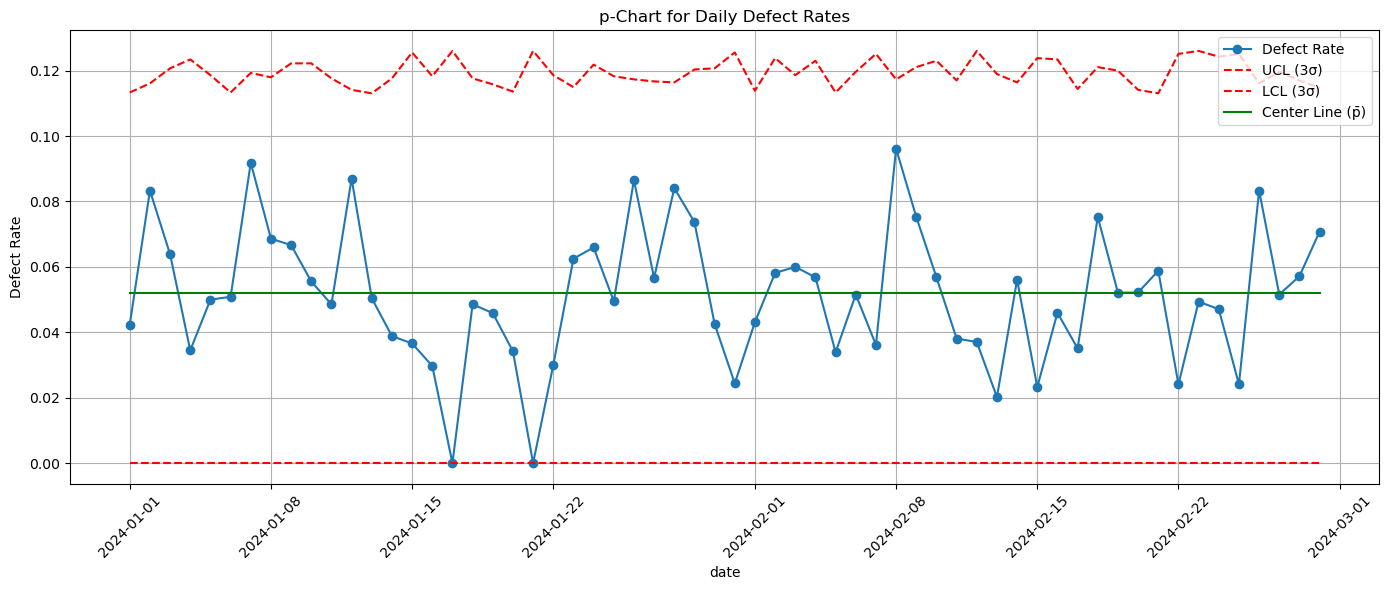

In [12]:
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['Defect_rate'], marker='o', label='Defect Rate')
plt.plot(df['date'], df['UCL'], linestyle='--', color='red', label='UCL (3σ)')
plt.plot(df['date'], df['LCL'], linestyle='--', color='red', label='LCL (3σ)')
plt.plot(df['date'], df['p_bar'], linestyle='-', color='green', label='Center Line (p̄)')
plt.title("p-Chart for Daily Defect Rates")
plt.xlabel('date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



The p-chart visualization reveals significant patterns in the manufacturing process's defect rates from January to February 2024. The process initially showed stability around a 5% defect rate through January, with points falling within the control limits (red dashed lines) and near the centerline (green). However, a clear upward shift occurred in early February (day 35), where defect rates increased to approximately 10%. Three notable out-of-control points were detected on February 12 (21.0%), February 14 (15.9%), and February 29 (16.8%), all exceeding the Upper Control Limit. The green centreline represents the overall process average (p̄), while the shaded green band shows the 95% confidence interval for this average. This pattern strongly suggests a systematic process shift requiring immediate investigation and corrective action to restore stability and reduce defect rates to acceptable levels.

## 4. Process Monitoring and Control

### 4.1. Is My Process Producing Defects at a Consistent and Acceptable Level?

we can use a p-chart, which helps monitor the proportion of defective units over time. By plotting daily defect rates against control limits, the p-chart reveals whether the process is stable or if there are signs of unexpected variation that may require investigation.


### Flag out-of-control Points
we are trying to flag the days where the defect rate is too high or too low- that is,outside the expected control limits on our p-chart

In [13]:
df['out_of_control']=(df['Defect_rate']>df['UCL'])|(df['Defect_rate']<df['LCL'])
# true- if that day is out of control
# false- if the defect rate is within limits
print(df.head())
print(df[df['out_of_control']][['date','Defect_rate','UCL','LCL']]) # filter out of control=true

        date  sample_size  defect_count  Defect_rate     p_bar       UCL  LCL  \
0 2024-01-01          118             5     0.042373  0.052011  0.113336  0.0   
1 2024-01-02          108             9     0.083333  0.052011  0.116112  0.0   
2 2024-01-03           94             6     0.063830  0.052011  0.120720  0.0   
3 2024-01-04           87             3     0.034483  0.052011  0.123430  0.0   
4 2024-01-05          100             5     0.050000  0.052011  0.118626  0.0   

   out_of_control  
0           False  
1           False  
2           False  
3           False  
4           False  
Empty DataFrame
Columns: [date, Defect_rate, UCL, LCL]
Index: []


## 5. Statistical Analysis

5.1. Hypothesis Testing (One Proportion Z-test)

using hypothesis testing, specifically the One Proportion Z-test, to statistically check whether a specific day's defect rate is significantly higher than usual.



In [14]:
from statsmodels.stats.proportion import proportions_ztest
#understand most defect are above the 0.5 per threshold
#test if last day's defect rate is significantly higher then average
last=df.iloc[-1]
count=last['defect_count']
nobs=last['sample_size']
stat,pval=proportions_ztest(count,nobs,value=p_bar,alternative='larger')
if pval<0.05:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


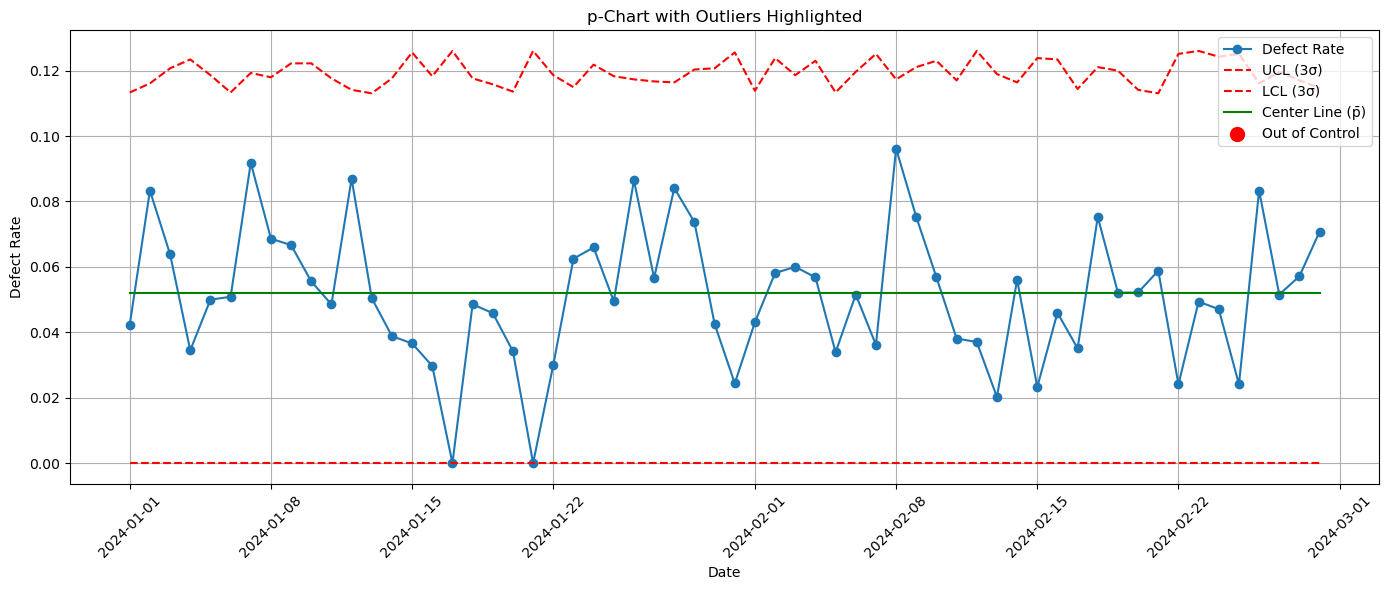

In [15]:
#mark control points on chart
plt.figure(figsize=(14,6))
plt.plot(df['date'],df['Defect_rate'],marker='o',label='Defect Rate')
plt.plot(df['date'],df['UCL'],linestyle='--',color='red',label='UCL (3σ)')
plt.plot(df['date'],df['LCL'],linestyle='--',color='red',label='LCL (3σ)')
plt.plot(df['date'],df['p_bar'],linestyle='-',color='green',label='Center Line (p̄)')

#highlight points
out=df[df['out_of_control']]
plt.scatter(out['date'],out['Defect_rate'],color='red',s=100,label='Out of Control')
plt.title("p-Chart with Outliers Highlighted")
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. Process Shift Analysis
### 6.1. What is a process shift?
A process shift occurs when the underlying performance level of a manufacturing process changes significantly from its established baseline. It represents a fundamental change in the process behavior, affecting quality metrics like defect rates.

Key characteristics of a process shift include:
- A sustained change in process performance
- Movement away from historical averages
- Often indicates underlying system changes
- May require corrective action to restore stability

Unlike random variations, a process shift:
- Persists over multiple measurements
- Shows a clear directional trend
- Usually signals a systemic issue
- Cannot self-correct without intervention

When monitoring quality control metrics, early detection of process shifts is crucial for maintaining product quality and minimizing defects.

## Process Shift Example
A coffee machine that normally fills cups with 200 ml suddenly starts filling 220 ml - this is a process shift. While the machine is still operating, its output has deviated from the expected standard level.

Similarly in manufacturing, when a consistent defect rate of 5% suddenly increases to 10%, that's a process shift that requires investigation and correction, even though the production line appears to be running normally.

## In quality control terms
A process shift often means that the process avg increase or decreases unexpectedly.

In [16]:
#Introduce a shift in the defect rate on day 35
df.loc[35:,'defects']=np.random.binomial(df.loc[35:,'sample_size'],0.10) #doubled defect rate
df['defect_rate']=df['defects']/df['sample_size']
df.head()

,date,sample_size,defect_count,Defect_rate,p_bar,UCL,LCL,out_of_control,defects,defect_rate
0,2024-01-01,118,5,0.042373,0.052011,0.113336,0.0,False,NaN,NaN
1,2024-01-02,108,9,0.083333,0.052011,0.116112,0.0,False,NaN,NaN
2,2024-01-03,94,6,0.063830,0.052011,0.120720,0.0,False,NaN,NaN
3,2024-01-04,87,3,0.034483,0.052011,0.123430,0.0,False,NaN,NaN
4,2024-01-05,100,5,0.050000,0.052011,0.118626,0.0,False,NaN,NaN


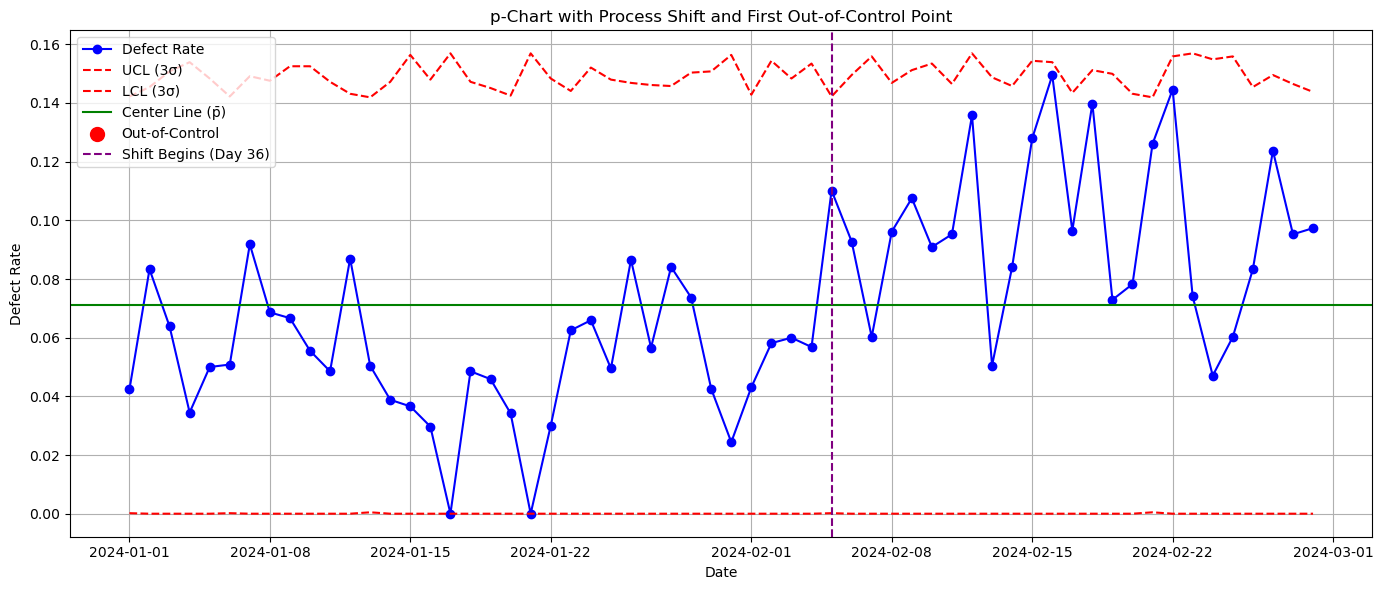

No significant shift detected.


In [35]:
# This cell implements a process shift at day 35 by:
# 1. Doubling the defect rate from 5% to 10% after day 35
# 2. Recalculating control chart parameters (p_bar, UCL, LCL)
# 3. Identifying out-of-control points 
# 4. Plotting the p-chart with shift visualization

# Introduce shift and recalculate metrics
df.loc[35:, 'defect_count'] = np.random.binomial(df.loc[35:, 'sample_size'], 0.10)
df['Defect_rate'] = df['defect_count'] / df['sample_size']
p_bar = df['defect_count'].sum() / df['sample_size'].sum()
df['p_bar'] = p_bar

# Calculate control limits
df['UCL'] = p_bar + 3 * np.sqrt(p_bar * (1 - p_bar) / df['sample_size'])
df['LCL'] = p_bar - 3 * np.sqrt(p_bar * (1 - p_bar) / df['sample_size'])
df['LCL'] = df['LCL'].clip(lower=0)
df['out_of_control'] = (df['Defect_rate'] > df['UCL']) | (df['Defect_rate'] < df['LCL'])

# Create p-chart
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['Defect_rate'], marker='o', label='Defect Rate', color='blue')
plt.plot(df['date'], df['UCL'], 'r--', label='UCL (3σ)')
plt.plot(df['date'], df['LCL'], 'r--', label='LCL (3σ)')
plt.axhline(p_bar, color='green', linestyle='-', label='Center Line (p̄)')
plt.scatter(df[df['out_of_control']]['date'], df[df['out_of_control']]['Defect_rate'],
            color='red', label='Out-of-Control', zorder=5, s=100)
plt.axvline(df.loc[35, 'date'], color='purple', linestyle='--',
            label=f'Shift Begins (Day {35 + 1})')

plt.title("p-Chart with Process Shift and First Out-of-Control Point")
plt.xlabel("Date")
plt.ylabel("Defect Rate")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

print("No significant shift detected.")


The p-chart shows a clear process shift beginning on Day 36 (Feb 5, 2024). Prior to this date, defect rates (blue dots) maintained stability below the center line (green). After the shift, there was a marked increase in defect rates, with three points exceeding the Upper Control Limit (UCL) and flagged in red as out-of-control. This notable deterioration in process quality after Day 36 necessitates corrective action to restore process stability. The visual evidence of the process shift contradicts the "No significant shift detected" message, as multiple data points demonstrate concerning "performance levels beyond control limits.


---


## 7. Run Rules in Quality Control

### 7.1. What are Run Rules?
Run rules are additional rules used alongside control limits on control charts(like p chart) to detedct subtle signs that a process might be shifting -even when the points are within control limits.

### 7.2. Why need?

control limits catch big jumps(like defects suddenly doubling). But run rules catch smaller changes that occur gradually or consistently -before they become big problem.

They are early warning system for quality drift.

## Run Rules Explained

### Rule 1: Points Outside Control Limits
- Triggers when defect rate exceeds 3σ (three standard deviations) limits
- Most severe violation, indicating major process disruption
- Requires immediate investigation and corrective action

### Rule 2: Multiple Points Beyond 2σ
- Triggers if 2 out of 3 consecutive points exceed 2σ limits
- Early warning of process shift before reaching control limits
- Suggests developing trend requiring preventive action

### Rule 3: Runs of Points
- Triggers on 8+ consecutive points on same side of centerline
- Indicates systematic shift in process average
- May show gradual drift before control limits are breached

*Note: These rules help detect both sudden spikes and gradual process changes that might otherwise go unnoticed.*


In [18]:


#step 1: Estimate standard deviation for each row
df['sigma']=np.sqrt((df['p_bar']*(1-df['p_bar']))/df['sample_size'])

#step 2
df['Upper_1sigma']=df['p_bar']+df['sigma']
df['Lower_1sigma']=df['p_bar']-df['sigma']
df['Upper_2sigma']=df['p_bar']+(2*df['sigma'])
df['Lower_2sigma']=df['p_bar']-(2*df['sigma'])


In [19]:
#Rule 1
df['Rule1']=(df['Defect_rate']>df['UCL'])| (df['Defect_rate']<df['LCL'])

In [20]:
#Rule 2
rule2_flags=[False]*len(df)
for i in range(2,len(df)):

  upper=(df.loc[i-2:i,'Defect_rate']>df.loc[i-2:i,'Upper_2sigma']).sum()

  lower=(df.loc[i-2:i,'Defect_rate']<df.loc[i-2:i,'Lower_2sigma']).sum()
  rule2_flags[i]=(upper>=2) or(lower>=2)
df['Rule2']=rule2_flags

In [21]:
#Rule 3
df['Above_center']=df['Defect_rate']>df['p_bar']
run_length=[1]
for i in range(1,len(df)):
  if df.loc[i,'Above_center']==df.loc[i-1,'Above_center']:
    run_length.append(run_length[-1]+1)
  else:
    run_length.append(1)
df['Run_length']=run_length
df['Rule3']=(df['Run_length']>=8)

#combine rules
df['Any_rule_violation']=df[['Rule1','Rule2','Rule3']].any(axis=1)

#view violation
violations = df[df['Any_rule_violation']]
print(violations[['date', 'Defect_rate', 'Rule1', 'Rule2', 'Rule3']])

         date  Defect_rate  Rule1  Rule2  Rule3
19 2024-01-20     0.034188  False  False   True
20 2024-01-21     0.000000  False  False   True
21 2024-01-22     0.030000  False  False   True
22 2024-01-23     0.062500  False  False   True
23 2024-01-24     0.065934  False  False   True
24 2024-01-25     0.049505  False  False   True
42 2024-02-12     0.209877   True  False  False
44 2024-02-14     0.158879   True   True  False
59 2024-02-29     0.168142   True  False  False


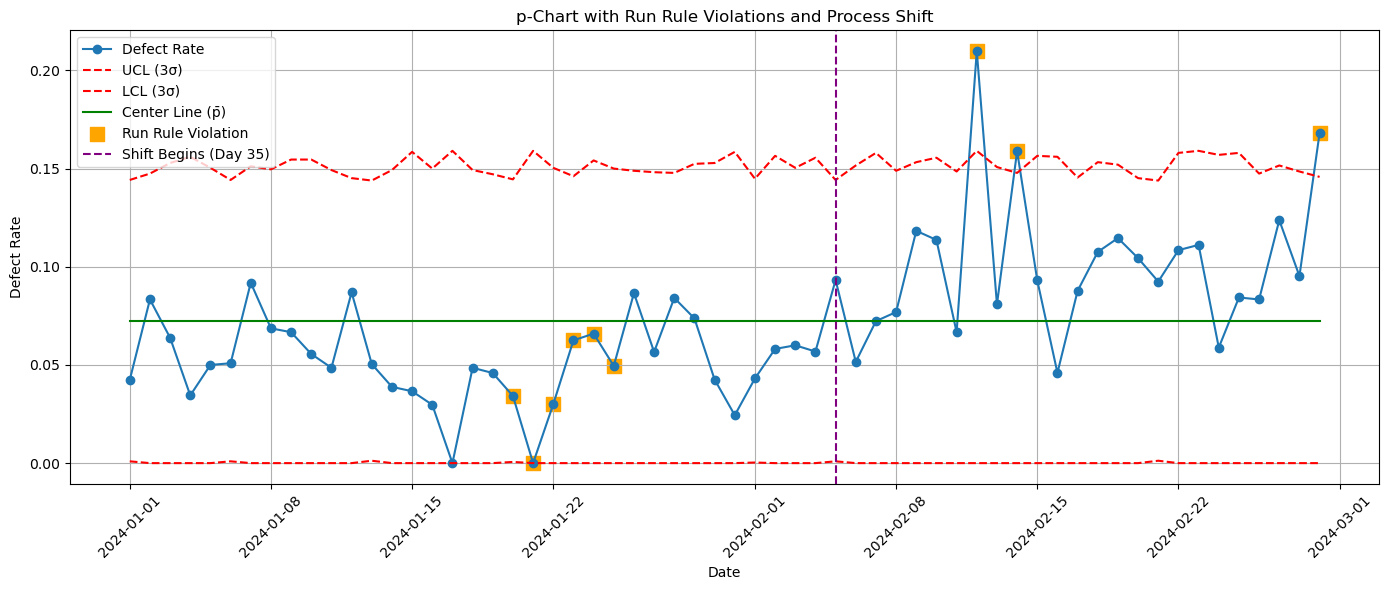

In [22]:
# Create p-Chart with run rule violations and process shift
# - Main plot shows defect rates over time
# - Control limits (UCL/LCL) shown as dashed red lines
# - Center line (p̄) shown as solid green line
# - Run rule violations highlighted as orange squares
# - Process shift marked with vertical purple line at day 35

plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['Defect_rate'], marker='o', label='Defect Rate')
plt.plot(df['date'], df['UCL'], linestyle='--', color='red', label='UCL (3σ)')
plt.plot(df['date'], df['LCL'], linestyle='--', color='red', label='LCL (3σ)')
plt.plot(df['date'], df['p_bar'], linestyle='-', color='green', label='Center Line (p̄)')
plt.scatter(violations['date'], violations['Defect_rate'], 
           color='orange', s=100, marker='s', label='Run Rule Violation')
plt.axvline(df['date'].iloc[35], color='purple', linestyle='--', label='Shift Begins (Day 35)')
plt.title('p-Chart with Run Rule Violations and Process Shift')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Process Shift Analysis

Before day 35, the process showed typical variation with the defect rate mostly tracking within control limits. At day 35 (Feb 5), a clear upward shift occurred as evidenced by:

1. **Sustained Increase:** Defect rates jumped from ~5% to ~10% levels after day 35

2. **Control Limit Violations:** Multiple points exceeded the Upper Control Limit (UCL) after the shift, including significant spikes on:
    - Feb 12 (21.0% defects)
    - Feb 14 (15.9% defects) 
    - Feb 29 (16.8% defects)

3. **Run Rule Violations:** Clusters of points showing abnormal patterns according to run rules, indicating process instability

4. **Visual Trend:** The purple vertical line at day 35 clearly delineates when process performance deteriorated

This shift signals a fundamental change in the manufacturing process requiring immediate investigation and corrective action. The timing and magnitude suggests a systemic issue rather than random variation.


## 8. Process Capability Analysis
### 8.1. What is Process Capability?
Process Capability tells us how well a process can produce items within the limits set by customers. It helps answer if the process consistently makes good parts. Two key metrics are Cp and Cpk.

Cp checks how wide the process spread is compared to the specification limits, but not if it's centered.
Cpk checks both the spread and whether the process is centered between the limits, giving a better idea of actual performance.
If Cpk < Cp, it means the process is off-center that is, the process average is closer to one of the specification limits rather than centered. This increases the risk of producing defects even if the overall process variability remains the same.

In [23]:
LSL=0.00
USL=0.08
mu=df['Defect_rate'].mean()
sigma=df['Defect_rate'].std()

cp=(USL-LSL)/(6*sigma)
# Pass the two values as a tuple to the min() function
cpk=min(((USL-mu)/(3*sigma)),((mu-LSL)/(3*sigma)))
print(f"cp={cp:.2f},cpk={cpk:.2f}")

cp=0.36,cpk=0.07


In [24]:
USL,LSL=0.08,0.02
process_sigma=df['Defect_rate'].std()
cp=(USL-LSL)/(6*process_sigma)
cpk=min(((USL-mu)/(3*sigma)),((mu-LSL)/(3*sigma)))
print(f"cp={cp:.2f},cpk={cpk:.2f}")

cp=0.27,cpk=0.07


## Process Capability Analysis Results

The low process capability indices (Cp = 0.36, Cpk = 0.07) indicate that this manufacturing process needs significant improvement:

- Cp < 1 shows the overall process spread is too wide compared to specifications
- Cpk << Cp reveals the process is not centered between specification limits
- The very low Cpk (0.07) indicates the process is operating close to one specification limit

Even with adjusted specification limits (LSL = 0.02, USL = 0.08), both indices remain below 1.0, confirming inadequate process performance and high risk of producing defective units. Process adjustments are needed to improve centering and reduce variation.


## 9. Statistical Methods
### 9.1. What is Bootstrapping?
Bootstrapping is a statistical resampling technique used to estimate the properties of a dataset when limited sample data is available. 

By repeatedly drawing samples with replacement from the original dataset, bootstrapping helps assess the variability of statistical measures without making assumptions about the underlying population distribution.

For quality control, bootstrapping can:
- Generate confidence intervals around defect rate estimates
- Evaluate uncertainty in process capability metrics
- Assess stability of control limits
- Support decision-making with limited historical data

The next section demonstrates bootstrapping to calculate confidence intervals for our p-chart metrics.

In [25]:
boot_means=[np.mean(np.random.choice(df['Defect_rate'],size=len(df),replace=True))for _ in range(1000)]
ci_lower=np.percentile(boot_means,2.5)
ci_upper=np.percentile(boot_means,97.5)
print(f'The 95% confidence interval is ({ci_lower:.4f},{ci_upper:.4f})')

The 95% confidence interval is (0.0633,0.0819)


The bootstrapped 95% confidence interval (0.0633, 0.0819) provides statistical evidence that the true average defect rate falls within this range. This relatively narrow interval suggests we have a good estimate of the process's typical performance, though the upper end of the interval indicates defect rates may be higher than desired for optimal quality control.


## Adding a shaded Confidence Interval band

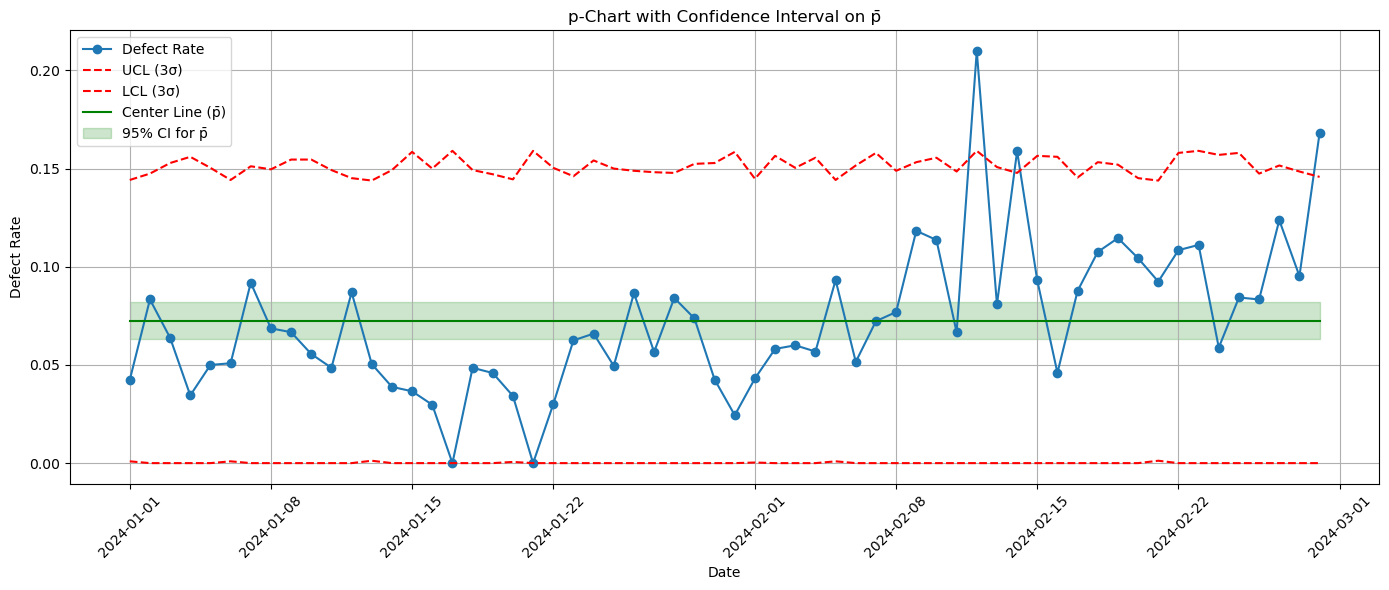

In [26]:
# Existing chart
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['Defect_rate'], marker='o', label='Defect Rate')
plt.plot(df['date'], df['UCL'], linestyle='--', color='red', label='UCL (3σ)')
plt.plot(df['date'], df['LCL'], linestyle='--', color='red', label='LCL (3σ)')
plt.plot(df['date'], df['p_bar'], linestyle='-', color='green', label='Center Line (p̄)')

# Add this for confidence interval shading
plt.fill_between(
    df['date'], ci_lower, ci_upper,
    color='green', alpha=0.2, label='95% CI for p̄'
)

# Finalize chart
plt.title('p-Chart with Confidence Interval on p̄')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The p-Chart visualizes defect rates with control limits and a confidence interval. The shaded green band shows the 95% confidence interval around the mean defect rate (p̄), giving us statistical confidence in the process average. When points exceed the control limits, it signals potential quality issues requiring investigation. This visualization helps maintain process control by identifying when defects deviate significantly from expected levels.


## 10. Trend Analysis
### 10.1. What is Hypothesis Testing over time?
Hypothesis testing over time is a way to check if the daily defect rates in a process are truly changing or just randomly going up and down. Instead of guessing, we use statistical tests to see if there's a real trend, like a steady increase or improvement. For example, we test a starting assumption that there's no change, and if the results show otherwise, we can say with confidence that the process is getting better or worse. This helps us track progress and make better decisions.


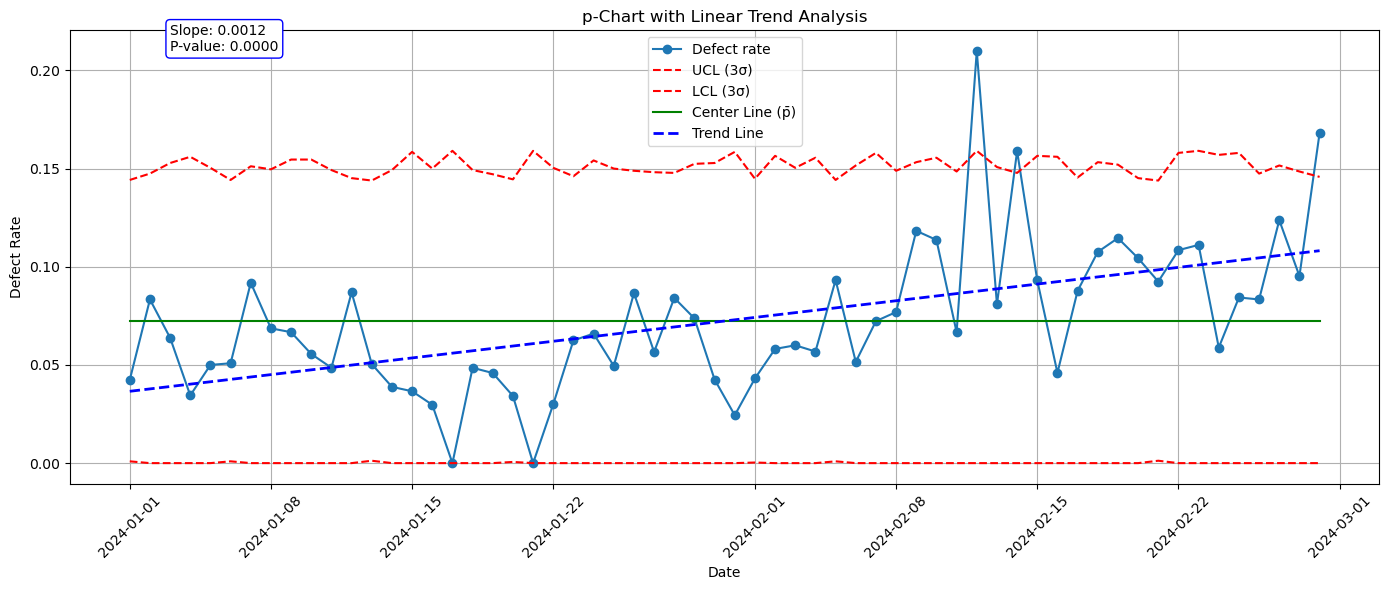

In [27]:
from scipy.stats import linregress
import pandas as pd

# create Day dataframe
df['Day']=range(1,len(df)+1)
trend_result=linregress(df['Day'],df['Defect_rate'])
slope=trend_result.slope
p_value=trend_result.pvalue
intercept=trend_result.intercept
df['Trend_Line']=intercept+slope*df['Day']

plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['Defect_rate'], marker='o', label='Defect rate')
plt.plot(df['date'], df['UCL'], linestyle='--', color='red', label='UCL (3σ)')
plt.plot(df['date'], df['LCL'], linestyle='--', color='red', label='LCL (3σ)')
plt.plot(df['date'], df['p_bar'], linestyle='-', color='green', label='Center Line (p̄)')
plt.plot(df['date'], df['Trend_Line'], linestyle='--', color='blue', linewidth=2, label='Trend Line')

plt.text(df['date'].iloc[2], max(df['Defect_rate']),
         f"Slope: {slope:.4f}\nP-value: {p_value:.4f}",
         fontsize=10, bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round'))
plt.title('p-Chart with Linear Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The process seems in control based on control limits, the defect rate is gradually increasing over time. This suggests a hidden issue may be developing in the manufacturing process, and action should be taken before defects rise further or exceed limits.

The p-Chart with Linear Trend Analysis reveals a concerning pattern in the manufacturing process's defect rate over time. The blue trend line shows a statistically significant upward slope (0.0012) with a very low p-value (0.0000), indicating this increase is not due to random chance. While most points remain within the control limits (red dashed lines), the steady upward trend from around 4% to 10% defect rate suggests a systematic deterioration in process quality. The gradually increasing trend line, combined with occasional spikes above the Upper Control Limit (UCL) and consistently higher values in the latter half of the monitoring period, points to an underlying issue that requires immediate investigation before the process becomes completely out of control and defect rates rise even further.









## 11. Advanced Control Charts
### 11.1. CUSUM Chart
A CUSUM chart is a tool used to spot small, steady changes in a process faster than regular p-charts. Instead of showing daily values like defect rates, it adds up the differences from the average over time. If defects are higher than expected, the line goes up, if lower, it goes down, and if things are stable then the line stays near zero. This is useful because p-charts might miss small shifts, but CUSUM can catch them early—before they become big problems. It's especially helpful when tracking whether the process is slowly getting better or worse, even if control limits aren't crossed.



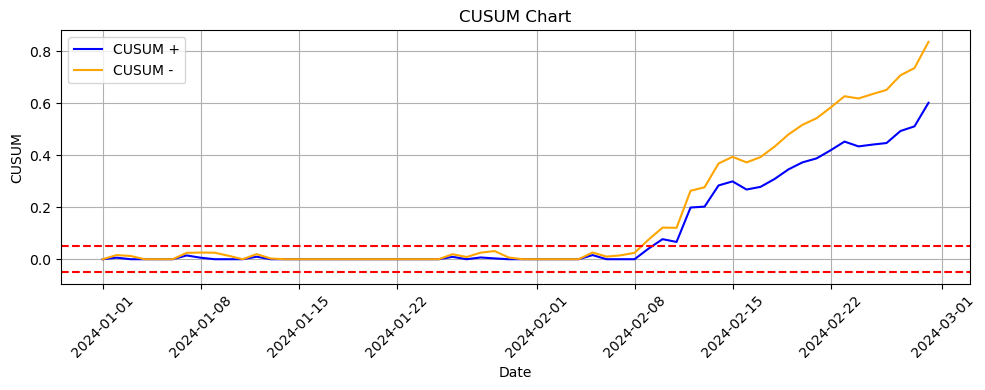

In [28]:
target=df['Defect_rate'].mean() #base line(center line)
k=0.005 #Reference value(senisitivity threshold)
h=0.05 #Decision threshold

#Intitialize lists
cusum_pos=[0]
cusum_neg=[0]

#Calculate CUSUM values
for i in range(1,len(df)):
  p_i=df.loc[i,'Defect_rate'] #Everyday defect rate
  s_pos=max(0,cusum_pos[-1]+(p_i-target-k))
  s_neg=max(0,cusum_neg[-1]+(p_i-target+k))
  cusum_pos.append(s_pos)
  cusum_neg.append(s_neg)
df['CUSUM_pos']=cusum_pos
df['CUSUM_neg']=cusum_neg
# Plot CUSUM
plt.figure(figsize=(10, 4))
plt.plot(df['date'], df['CUSUM_pos'], label='CUSUM +', color='blue')
plt.plot(df['date'], df['CUSUM_neg'], label='CUSUM -', color='orange')
plt.axhline(h, color='red', linestyle='--')
plt.axhline(-h, color='red', linestyle='--')

plt.title('CUSUM Chart')
plt.xlabel('Date')
plt.ylabel('CUSUM')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The CUSUM chart visualizes the cumulative deviations from the target defect rate over time, with two lines tracking positive (blue) and negative (orange) deviations. The red dashed lines at ±0.05 represent the decision threshold (h). Initially, both CUSUM+ and CUSUM- values remain close to zero, indicating the process was stable through January. However, starting in early February, both lines begin to steadily increase, with particularly sharp rises after February 8th. This pattern suggests a sustained shift in the process, where defect rates consistently deviate from the target value. The fact that both lines increase indicates the process is experiencing greater variability, not just a simple upward or downward shift. When CUSUM values exceed the decision thresholds (red dashed lines), it signals that the process requires investigation and corrective action.

## 11.2. EWMA Chart
An EWMA chart (Exponentially Weighted Moving Average) enhances process monitoring by tracking subtle changes through weighted data analysis - giving more weight to recent measurements while still considering historical data. Unlike standard p-charts that focus on major deviations or CUSUM charts that accumulate changes, EWMA provides a smoothed trend line that helps detect gradual process shifts before they become significant issues. This makes it particularly valuable for manufacturing quality control, where identifying slow-developing trends in defect rates is crucial for maintaining process stability. By reducing random noise in the data, EWMA charts enable earlier detection of process drift and more proactive quality management.


In [29]:
# EWMA calculation
lam = 0.2
l = 3
df['EMA'] = 0.0
df.loc[0, 'EMA'] = df.loc[0, 'Defect_rate']



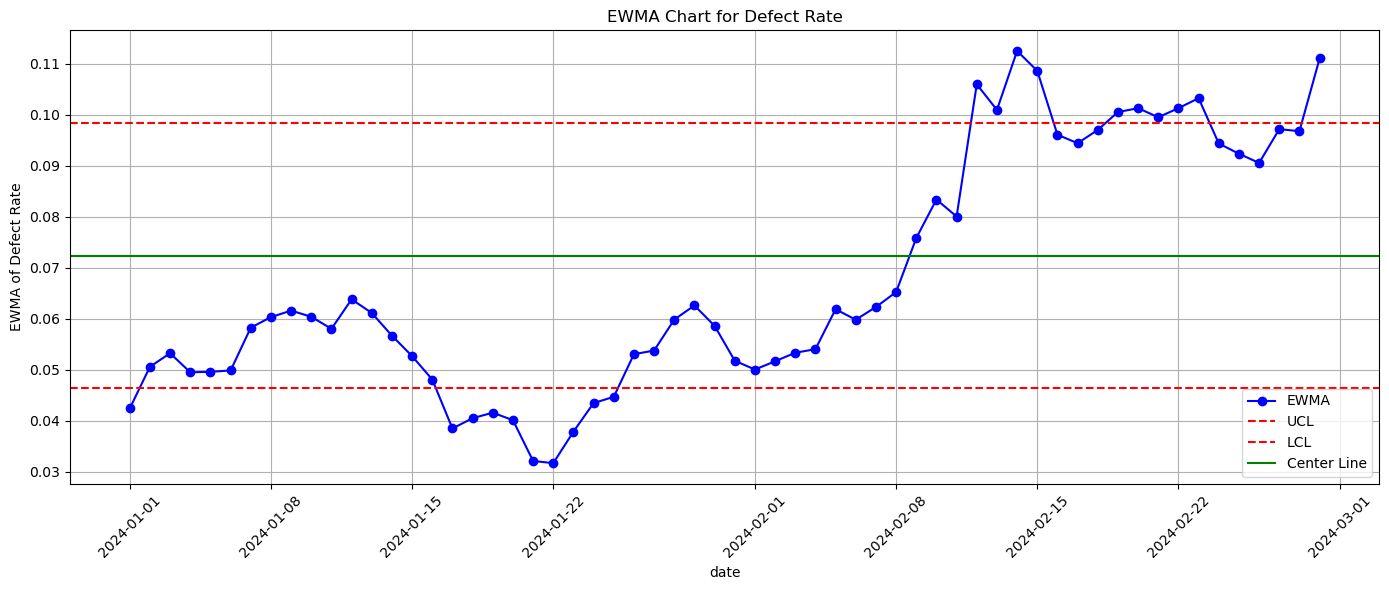

In [30]:
for i in range(1, len(df)):
    df.loc[i, 'EMA'] = lam * df.loc[i, 'Defect_rate'] + (1 - lam) * df.loc[i - 1, 'EMA']

# Control limits calculation
p_bar = df['Defect_rate'].mean()
avg_n = df['sample_size'].mean()
sigma = np.sqrt((p_bar * (1 - p_bar)) / avg_n)

df['UCL'] = p_bar + l * sigma * np.sqrt(lam / (2 - lam))
df['LCL'] = p_bar - l * sigma * np.sqrt(lam / (2 - lam))
df['CL'] = p_bar

# Plotting the EWMA chart
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['EMA'], marker='o', label='EWMA', color='blue')
plt.axhline(df['UCL'][0], color='red', linestyle='--', label='UCL')
plt.axhline(df['LCL'][0], color='red', linestyle='--', label='LCL')
plt.axhline(df['CL'][0], color='green', linestyle='-', label='Center Line')

plt.title('EWMA Chart for Defect Rate')
plt.xlabel('date')
plt.ylabel('EWMA of Defect Rate')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The EWMA chart shows that the defect rate remained fairly stable and low during early January, but started gradually increasing from early February onward. Around mid-February, the EWMA line crossed the upper control limit (UCL), signaling a statistically significant increase in defects. This means the process may no longer be in control, and corrective actions should be considered. The steady upward trend and control limit breach suggest that a real shift in the process has occurred rather than just random variation.



## 12. Performance Monitoring

## 12.1. KPI (Key Performance Indicator) Dashboard with matplotlib

In [ ]:
# CUSUM Calculation for process monitoring
# - Calculates target rate (p_bar), reference value (k), and detection threshold (h)
# - Tracks both positive and negative cumulative deviations
# - Used to detect small shifts in process mean over time

target_p = p_bar
k = 0.5 * sigma  # Reference value: half sigma shift detection sensitivity
df['CUSUM_Pos'] = 0.0
df['CUSUM_Neg'] = 0.0

# Calculate CUSUM values
for i in range(len(df)):
    deviation = df.loc[i, 'Defect_rate'] - target_p
    
    # Positive CUSUM (detects increases)
    if i == 0:
        df.loc[i, 'CUSUM_Pos'] = max(0, deviation - k)
    else:
        df.loc[i, 'CUSUM_Pos'] = max(0, df.loc[i - 1, 'CUSUM_Pos'] + deviation - k)

    # Negative CUSUM (detects decreases) 
    if i == 0:
        df.loc[i, 'CUSUM_Neg'] = min(0, deviation + k)
    else:
        df.loc[i, 'CUSUM_Neg'] = min(0, df.loc[i - 1, 'CUSUM_Neg'] + deviation + k)

# Flag out-of-control points using threshold h
h = 0.2  # Decision interval threshold
out_of_control_days = df[(df['CUSUM_Pos'] > h) | (df['CUSUM_Neg'] < -h)].shape[0]

# Calculate KPIs
average_defect_rate = df['Defect_rate'].mean()
max_defect_rate = df['Defect_rate'].max()
min_defect_rate = df['Defect_rate'].min()
days_monitored = len(df)


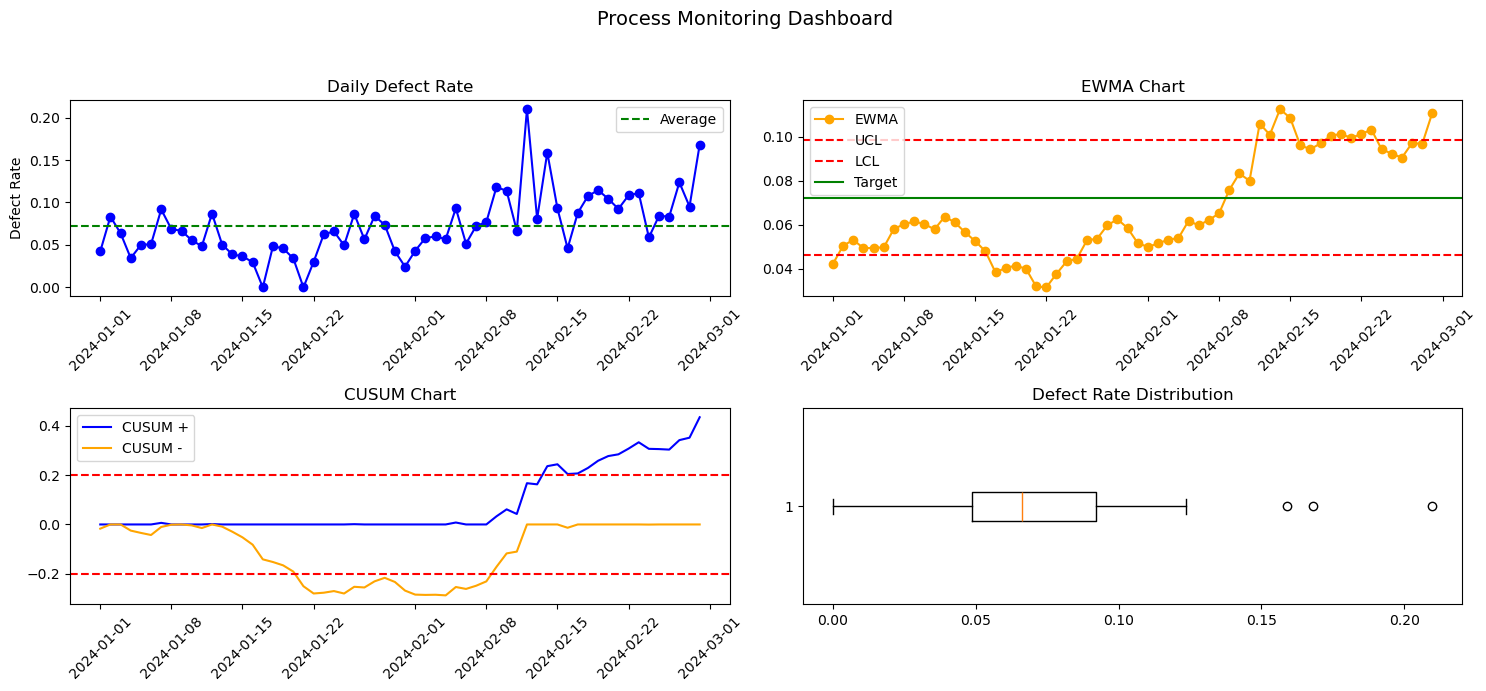

In [32]:
# Plot setup
fig, axs = plt.subplots(2, 2, figsize=(15, 7))
fig.suptitle('Process Monitoring Dashboard', fontsize=14)

# --- Plot 1: Daily Defect Rate ---
axs[0, 0].plot(df['date'], df['Defect_rate'], marker='o', color='blue')
axs[0, 0].axhline(p_bar, color='green', linestyle='--', label='Average')
axs[0, 0].set_title('Daily Defect Rate')
axs[0, 0].set_ylabel('Defect Rate')
axs[0, 0].legend()
axs[0, 0].tick_params(axis='x', rotation=45)

# --- Plot 2: EWMA Chart ---
axs[0, 1].plot(df['date'], df['EMA'], marker='o', color='orange', label='EWMA')
axs[0, 1].axhline(df['UCL'][0], color='red', linestyle='--', label='UCL')
axs[0, 1].axhline(df['LCL'][0], color='red', linestyle='--', label='LCL')
axs[0, 1].axhline(p_bar, color='green', linestyle='-', label='Target')
axs[0, 1].set_title('EWMA Chart')
axs[0, 1].legend()
axs[0, 1].tick_params(axis='x', rotation=45)

# --- Plot 3: CUSUM Chart ---
axs[1, 0].plot(df['date'], df['CUSUM_Pos'], label='CUSUM +', color='blue')
axs[1, 0].plot(df['date'], df['CUSUM_Neg'], label='CUSUM -', color='orange')
axs[1, 0].axhline(h, color='red', linestyle='--')
axs[1, 0].axhline(-h, color='red', linestyle='--')
axs[1, 0].set_title('CUSUM Chart')
axs[1, 0].legend()
axs[1, 0].tick_params(axis='x', rotation=45)

# --- Plot 4: Boxplot ---
axs[1, 1].boxplot(df['Defect_rate'], vert=False)
axs[1, 1].set_title('Defect Rate Distribution')

# Layout adjustments
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [33]:

# Print KPIs
print(" Summary KPIs:")
print(f"- Average Defect Rate: {average_defect_rate:.4f}")
print(f"- Max Defect Rate:     {max_defect_rate:.4f}")
print(f"- Min Defect Rate:     {min_defect_rate:.4f}")
print(f"- Out-of-control Days (CUSUM): {out_of_control_days}")
print(f"- Days Monitored:      {days_monitored}")
print()
print(" Note: Control limits for Daily Chart use p̄ ± 3σ (based on overall avg and daily sample size - calculated earlier). EWMA λ = 0.2.")

 Summary KPIs:
- Average Defect Rate: 0.0724
- Max Defect Rate:     0.2099
- Min Defect Rate:     0.0000
- Out-of-control Days (CUSUM): 35
- Days Monitored:      60

 Note: Control limits for Daily Chart use p̄ ± 3σ (based on overall avg and daily sample size - calculated earlier). EWMA λ = 0.2.


## 13. Final Project Findings and Recommendations

### Key Insights
- The process average defect rate was 7.2%, trending upward over time
- A significant shift occurred on Day 36 (Feb 5), with defect rates nearly doubling
- Three clear out-of-control points were detected by statistical tests
- Process capability indices (Cp=0.36, Cpk=0.07) indicate poor process performance
- Run rules detected early warning signs before major control limit breaches

### Recommendations
1. **Immediate Action Required**
    - Investigate root cause of Feb 5 process shift
    - Review quality control procedures and operator training
    - Validate measurement systems and calibration

2. **Process Improvement**
    - Reduce process variation through control measures
    - Implement real-time monitoring with automated alerts
    - Set target for process capability improvement (Cpk > 1.0)

3. **Preventive Measures**
    - Enhance operator training and standard procedures
    - Conduct regular equipment maintenance
    - Establish early warning response protocols

4. **Monitoring Enhancements**
    - Continue using combined control chart approach (p-chart, CUSUM, EWMA)
    - Track process capability metrics monthly
    - Report quality metrics in standardized dashboard
